# The Stroop Effect

Thomas Nececkas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math
import scipy.stats as stats
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In a Stroop task, people say aloud the ink color for each word in a list, and the total time needed to do so is measured.

There are two lists of words, all of which are color names. In the "congruent" list, the ink color matches the color words: for example <font color="red">RED</font> <font color="blue">BLUE</font>. In the "incongruent" list, the ink color does not match the color words: for example <font color="green">YELLOW</font> <font color="orange">PURPLE</font>.

This report will analyze the effects of color words' congruence or incongruence on participants' times. Specifically, it will analyze measurements from 24 participants, each of whom was presented with both a list of congruent and a list of incongruent color words.

## Variables

The independent variable is the congruence or incongruence of ink color with the list of color words. The dependent variable is the amount of time needed for a participant to say aloud the ink color for each list of words.

## Hypotheses and Appropriate Test

The null hypothesis is that the time needed to say aloud the ink colors will be the same for the lists of congruent and incongruent color words. 

How we frame the alternative hypothesis depends on what results would interest us. I suspect that it takes study participants longer to say aloud incongruent color words, but I'm not certain about that possibility and would be interested if the results showed the opposite were true. For that reason, it makes sense to analyze whether the population mean time to say aloud ink color for congruent words, $\mu_{C}$, does not equal the population mean time to say aloud ink color for incongruent words, $\mu_{I}$. In mathematical terms, it makes sense to analyse whether $\mu_{C} \neq \mu_{I}$, rather than only analyzing whether $\mu_{I} > \mu_{C}$. 

Therefore, the alternative hypothesis is that the time needed to say aloud the ink colors will be different for the lists of congruent and incongruent color words.

$H_{0}: \mu_{C} = \mu_{I}$<br>
$H_{A}: \mu_{C} \neq \mu_{I}$

We don't know the population parameters&mdash;i.e. the average time for all people in the world to complete the Stroop task. When we only have a sample, the appropriate statistical measure is a t-test. Since the alternative hypothesis is that $\mu_{C} \neq \mu_{I}$, rather than that $\mu_{I} > \mu_{C}$, or vice-versa, a two-tailed t-test is appropriate.

This is a "within-subjects" study design since the same study participants were presented with both lists. Therefore, a dependent t-test is appropriate.

More specifically, because we are interested in the difference between two sets of times, a dependent paired t-test is appropriate. Since we are focused on the difference in times, it will be useful to rewrite the hypotheses in terms of the mean difference. Let's define the mean difference, $\mu_{D}$, as follows:

$\mu_{D} = \mu_{I} - \mu_{C}$

Now the hypotheses can be rewritten as follows:

$H_{0}: \mu_{D} = 0$<br>
$H_{A}: \mu_{D} \neq 0$

## Descriptive Statistics and Distribution of Data

In [10]:
stroop = pd.read_csv('stroopdata.csv')
stroop['Difference'] = stroop['Incongruent'] - stroop['Congruent']

D = pd.Series(stroop['Difference'])

Mean of Differences in Time:

$\bar{x}_{D} = \sqrt{\frac{\sum x_{i}}{n}}$<br>

In [17]:
print('{:.2f}'.format(D.mean()))

7.96


Sample Standard Deviation of Differences in Time:

$s_{D} = \sqrt{\frac{\sum(\bar{x}_{D} - x_{i})^{2}}{n - 1}}$<br>

In [39]:
s_D = np.std(D, ddof=1)
print('{:.2f}'.format(s_D))

4.86


Below is a histogram chart for the differences in times for the study participants completing the Stroop tasks.

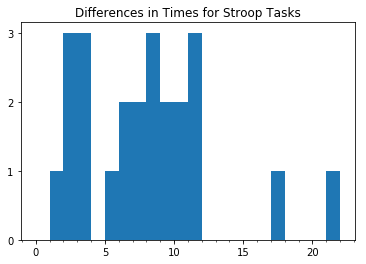

In [37]:
plt.hist(D, bins=22, range=(0,22))
plt.title("Differences in Times for Stroop Tasks")

ax = plt.gca()
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))

plt.show()

The most obvious take-away from the graph is that all of the differences in times for the stroop tasks are positive values. That means that every study participant took longer to say aloud the ink color in the list of incongruent color words compared to the congruent color words.

The other observations relate to the shape of the distribution. This isn't a clean normal distribution, but most of the data is clumped within 3 to 5 seconds of the mean and the data isn't clearly skewed in either direction. There are two values far to the right of the other datapoints, though it's unclear whether they qualify as outliers.

The t-test is designed for normally distributed data. While this data isn't perfectly normally distributed, it appears close enough that the use of the t-test is still appropriate.

## t-Test

Conducting a t-test requires first finding the standard error of the mean, which is an estimate of how far the sample mean is likely to be from the population mean.

Standard Error of the Mean:

In [53]:
SEM_D = stats.sem(D)
print('{:.2f}'.format(SEM_D))

0.99


The t-value is computed using the sample mean, the expected population mean, and the standard error of the mean. In this case, because the null hypothesis is that there will be no difference between the times to say aloud ink color for congruent and incongruent words, the expected population mean is zero.

$t = \frac{\bar{x}_D - \mu_{D}}{SEM}$<br><br>
$t = \frac{7.96 - 0}{0.99}$

In [58]:
t, p = stats.ttest_1samp(D, 0)
print('{:.3f}'.format(t))

8.021


The probability value, or p-value, is the smallest level of significance at which the null hypothesis could be rejected. A t-value of 8.021 corresponds to the following p-value:

In [72]:
print('{:.2E}'.format(p))

4.10E-08


#### Confidence Interval

Oftentimes, it's useful to determine the confidence interval for a sample mean. In other words, at a given significance level, or $\alpha$, what is the range of values in which the true population mean can be expected to fall.

Here, the t-value is so high that it's clear the results are going to be statistically significant at all common values of $\alpha$. For that reason, I'm going to calculate the confidence interval using $\alpha = 0.001$.

By consulting a [t-table](https://s3.amazonaws.com/udacity-hosted-downloads/t-table.jpg) and using the below values for $\alpha$ and degrees of freedom, we arrive at the following t-critical value, or $t_{C}$:

$\alpha = 0.001$<br><br>
$df = n - 1 = 24 - 1 = 23$<br><br>
$t_{C} = 3.768$

Note: Even though the $\alpha$ is 0.001, the correct value for $\alpha$ in the t-table is 0.0005. That's because this is a two-tailed t-test, so the $\alpha$ is split between the two tails.

To find the confidence interval, we next compute the margin of error, then apply the margin of error to the sample mean. Using an $\alpha$ of 0.001 will result in a 99.9% confidence interval.

$MOE = t_{C} * SEM$

In [70]:
MOE_D = 3.768 * SEM_D
print('{:.2f}'.format(MOE_D))

3.74


$CI: \bar{x}_D\: \pm\: MOE$

In [69]:
CI_low, CI_high = (D.mean() - MOE_D, D.mean() + MOE_D)
print('Confidence Interval: %.2f to %.2f' % (CI_low, CI_high))

Confidence Interval: 4.22 to 11.71


#### Analysis of t-Test and Confidence Interval

$t_{D}$ exceeds $t_{C}$ at an $\alpha$-value of 0.001, meaning the results are statistically signficant. To conceputalize the results another way, the expected population mean of 0 falls outside the 99.9% confidence interval for the population mean based on the sample mean. 

Based on these results, we can reject the null hypothesis. 

Looking at the direction in which the $t_{D}$ exceeded $t_{C}$, we can conclude it's likely that it takes people longer to say aloud ink color in a list of incongruent color words as opposed to a list of congruent color words.

## Conclusions

The results suggest that it takes people longer to say aloud ink colors in a list of incongruent color words like <font color="green">YELLOW</font> <font color="orange">PURPLE</font>, as opposed from ink colors in a list of congruent color words like <font color="red">RED</font> <font color="blue">BLUE</font>. This matched my expectations. 

I don't know the exact biological mechanism for the Stroop effect. Broadly speaking, it appears that when the brain receives conflicting input, it takes the brain longer to retrieve the desired input. Regardless of the biological mechanism, this analysis suggests that the Stroop effect is real. 